# Análisis de datos y relaciones entre variables.

## Importación de librerías y datos

Por medio de nuestra libería ESIOS_contoller.py importamos nuestro último dataset de datos y lo parseamos para su uso. Sirve tanto como para Drive como jupiter.

In [7]:
import json, urllib, datetime, pickle, time
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
from keras.optimizers import *
from scipy.stats import *
from importlib.machinery import SourceFileLoader


try:
  from google.colab import drive
  drive.mount('/content/drive')
  path = '/content/drive/My Drive/TFM/Utils/ESIOS_contoller.py'
  in_colab = True
except:
  path = '../utils/ESIOS_contoller.py'
  in_colab = False
  

esios_assembler = SourceFileLoader('esios', path).load_module()

esios_controller = esios_assembler.ESIOS(in_colab)
data_consumo = esios_controller.get_data()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mostrando los datos de data_total.csv
(30555, 29)
________________________________________________________________________________


Veamos ahora con tipos de variables nos econtramos: 
* **PVPC_DEF**: tarifa pvpc normal (la que hay que predecir)
* **PVPC_2_PED_NOC**: tarifa pvpc noturna
* **PVPC_ELEC_NOC**: tarifa pvpc electrica


* **Demanda**: demanda
* **Demanda real**: Demanda real
* **Prevista**: Demanda prevista	
* **Programada**: Demanda programada


* **Eolica**: demanda de eolica a hora
* **Nuclear**: demanda de Nuclear a hora
* **Solar**: demanda de Solar a hora	
* **Solar_Fotovoltaica**: demanda de Solar_Fotovoltaica a hora
* **Solar_Termica**	: demanda de Solar_Termica a hora
* **Generación prevista Solar**: generación prevista a día +1 solar
* **Termica_Renovable**: demanda de Termica_Renovable a hora


* **Holiday**: % festividad (0 laboral, 0,75 sabado, 1domingo)


* **Brent_price**: Precio del crudo de brent
* **Precio mercado SPOT Diario**: precio mercado España energia
* **Precio mercado SPOT Diario PT**: precio mercado Portugal energia
* **Precio mercado SPOT Diario FR**: precio mercado Francia energia
* **Precio de Regulación Secundaria subir**: indicador si subirá precio (futuro)
* **Precio de Regulación Secundaria bajar**


* **Saldo total interconexiones programa p48**: saldo total importación - exportación
* **Generación programada P48 Exportación Portugal**: saldo exportación portugal
* **Generación programada P48 Exportación Francia**: saldo exportación francia
* **Generación programada P48 Importación Portugal**: saldo importación portugal
* **Generación programada P48 Importación Francia**: saldo importación francia



In [2]:
print(data_consumo.columns)

Index(['fecha', 'PVPC_DEF', 'PVPC_2_PED_NOC', 'PVPC_ELEC_NOC',
       'date_timestamp', 'Demanda', 'Eolica', 'Nuclear', 'Solar',
       'Solar_Fotovoltaica', 'Solar_Termica', 'Termica_Renovable', 'Prevista',
       'Programada', 'date_day', 'Brent_price', 'Holiday',
       'Precio de Regulación Secundaria subir',
       'Precio de Regulación Secundaria bajar', 'Precio mercado SPOT Diario_x',
       'Demanda real', 'Generación prevista Solar',
       'Saldo total interconexiones programa p48',
       'Generación programada P48 Exportación Portugal',
       'Generación programada P48 Exportación Francia',
       'Generación programada P48 Importación Portugal',
       'Generación programada P48 Importación Francia', 'Precio SPOT PT',
       'Precio SPOT FR'],
      dtype='object')


## Estudio de las correlaciones

Ver la tabla de correlaciones es una muy buena forma de hacer una rápida prospección de las relaciones de los datos.

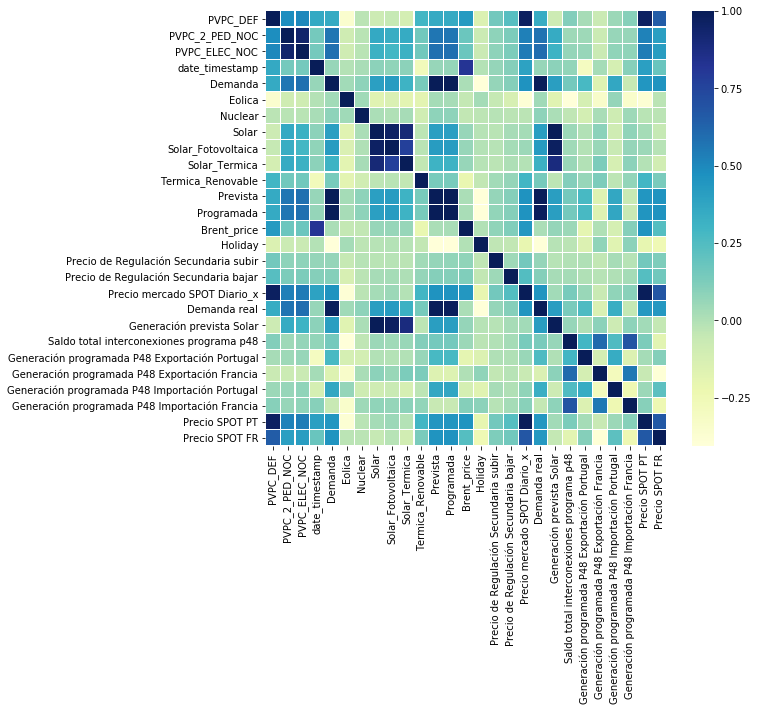

In [3]:
corrmat = data_consumo.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Veamos ahora las 13 mejores correlaciones con otras variables  para la varible del **precio**

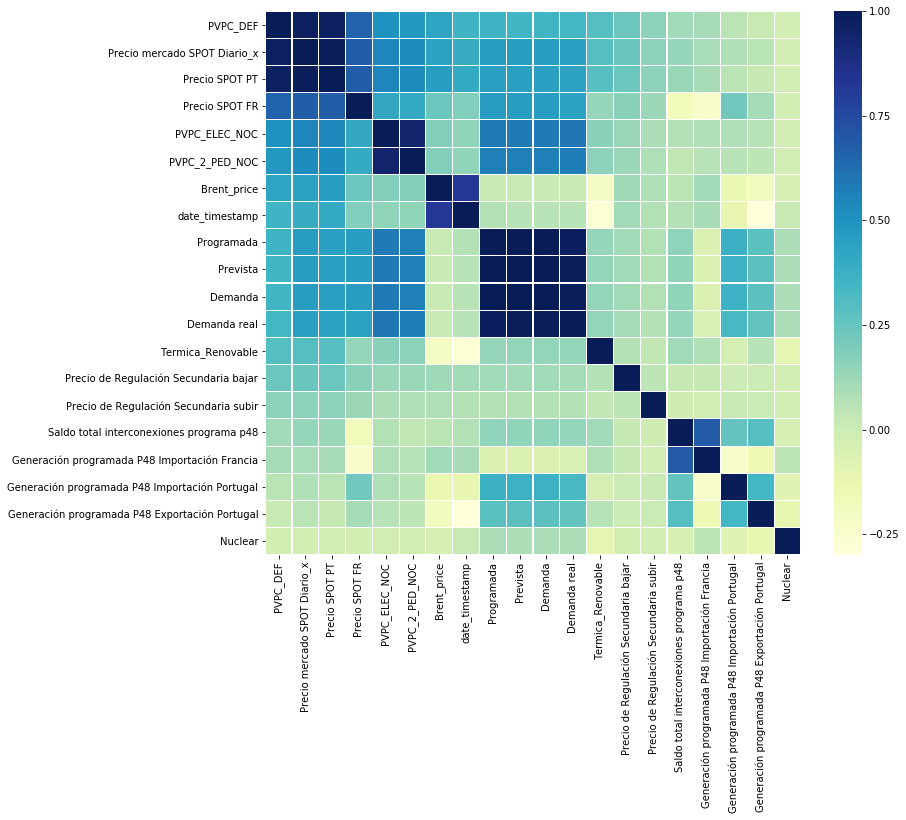

In [4]:
 k = 20
  
cols = corrmat.nlargest(k, 'PVPC_DEF')['PVPC_DEF'].index 
  
cm = np.corrcoef(data_consumo[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 

Bien, obviamente algunas variables como el precio SPOT tiene una alta correlación con el precio, pero estas de la misma forma que el precio pvpc, no la conocemos hasta el D+1. Utilizemos sólo las variables que podemos conocer en tiempo real: 

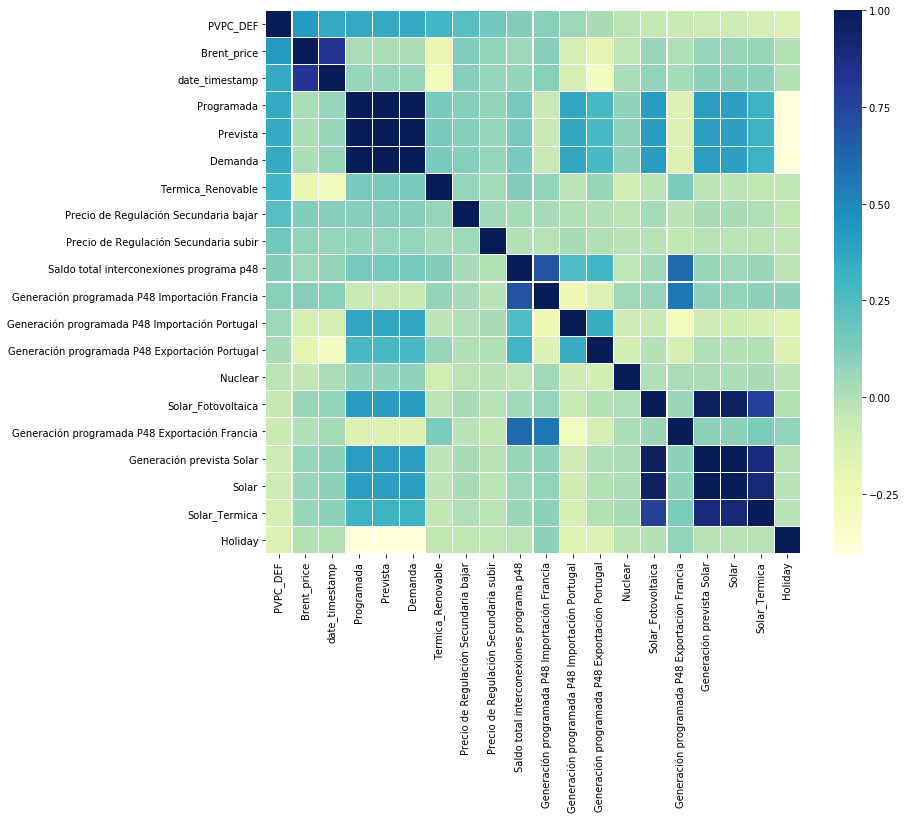

In [6]:
data_consumo_real_time = data_consumo.drop(columns=['PVPC_2_PED_NOC',
                                                    'PVPC_ELEC_NOC',
                                                    'Precio mercado SPOT Diario_x',
                                                    'Precio SPOT PT',
                                                    'Precio SPOT FR',
                                                    'Demanda real',
                                                   ])

k = 20
  
corrmat = data_consumo_real_time.corr()   
cols = corrmat.nlargest(k, 'PVPC_DEF')['PVPC_DEF'].index 
  
cm = np.corrcoef(data_consumo_real_time[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 

## Visualización de otras variables 

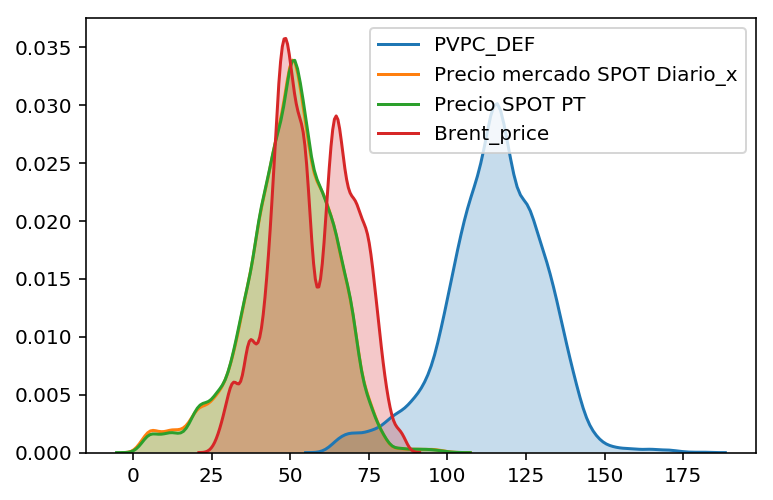

In [0]:
x = data_consumo['date_timestamp']
data_pvpc = data_consumo['PVPC_DEF']

data_spot = data_consumo['Precio mercado SPOT Diario_x']
data_pt = data_consumo['Precio SPOT PT']
data_dem = data_consumo['Demanda']
data_brent = data_consumo['Brent_price']

sns.kdeplot(data_pvpc, shade=True)
sns.kdeplot(data_spot, shade=True)
sns.kdeplot(data_pt, shade=True)
sns.kdeplot(data_brent, shade=True)

NameError: ignored

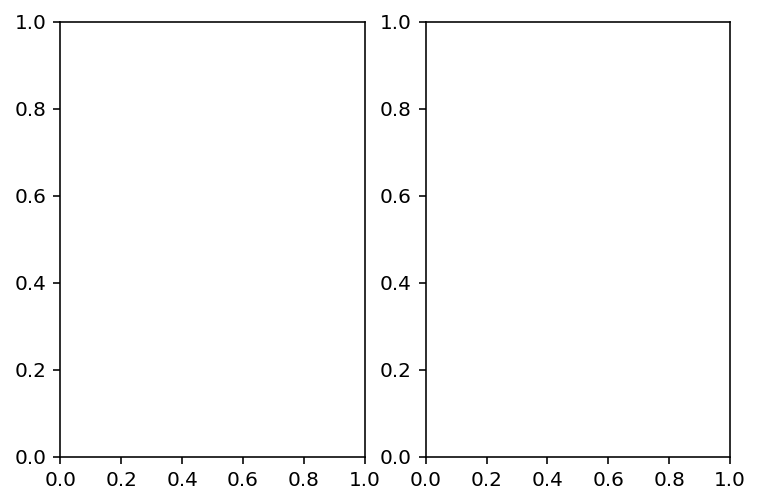

In [0]:
fig, ax =plt.subplots(1,2)
sns.lineplot(data_tiempo_semana, data_pvpc, ax=ax[0])
sns.lineplot(data_tiempo_semana, data_spot, ax=ax[0])
sns.lineplot(data_tiempo_semana, data_pt, ax=ax[0])
sns.lineplot(data_tiempo_semana, data_brent, ax=ax[0])
sns.lineplot(x, data_pvpc, ax=ax[1])
sns.lineplot(x, data_spot, ax=ax[1])
sns.lineplot(x, data_pt, ax=ax[1])
sns.lineplot(x, data_brent, ax=ax[1])
fig.show()

In [0]:

fig, ax =plt.subplots(1,2)
sns.lineplot(data_tiempo_semana, data_dem, ax=ax[0])
sns.lineplot(x, data_dem, ax=ax[1])
fig.show()


Estudio con las variables displobles real-time:

In [0]:
data_termica = data_consumo['Termica_Renovable']
data_prec_sub = data_consumo['Precio de Regulación Secundaria subir']
data_saldo = data_consumo['Saldo total interconexiones programa p48']
data_nuclear = data_consumo['Nuclear']

fig, ax =plt.subplots(1,2)
sns.lineplot(data_tiempo_semana, data_pvpc, ax=ax[0])
sns.lineplot(data_tiempo_semana, data_termica, ax=ax[0])
sns.lineplot(x, data_pvpc,  ax=ax[1])
sns.lineplot(x, data_termica, ax=ax[1])
fig.show()

In [0]:

fig, ax =plt.subplots(1,2)
sns.lineplot(data_tiempo_semana, data_pvpc, ax=ax[0])
sns.lineplot(data_tiempo_semana, data_prec_sub, ax=ax[0])
sns.lineplot(x, data_pvpc,  ax=ax[1])
sns.lineplot(x, data_prec_sub, ax=ax[1])
fig.show()

In [0]:

fig, ax =plt.subplots(1,2)
sns.lineplot(data_tiempo_semana, data_pvpc, ax=ax[0])
sns.lineplot(data_tiempo_semana, data_saldo, ax=ax[0])
sns.lineplot(x, data_pvpc,  ax=ax[1])
sns.lineplot(x, data_saldo, ax=ax[1])
fig.show()

In [0]:

fig, ax =plt.subplots(1,2)
sns.lineplot(data_tiempo_semana, data_pvpc, ax=ax[0])
sns.lineplot(data_tiempo_semana, data_nuclear, ax=ax[0])
sns.lineplot(x, data_pvpc,  ax=ax[1])
sns.lineplot(x, data_nuclear, ax=ax[1])
fig.show()

In [0]:
sns.boxplot(data_spot)

In [0]:
sns.boxplot(data_brent)

In [0]:
sns.boxplot(data_pt)